### Installing the datarobot package
The datarobot package is hosted on PyPI. You can install it via below code from the command line:


pip install datarobot

### Let's import the datarobot package. By convention, we always import it with the alias dr.

In [1]:
import datarobot as dr
import datetime
import pandas as pd

### Below are the three ways on which you can initialize DataRobot

The Python client can be configured in several ways. Inthis notebook we will point to a yaml file that has the information. This is a text file (.yaml file) containing two lines like this:

endpoint: https://app.datarobot.com/api/v2/

token: not-my-real-token


In [2]:
# 1) Initialization with arguments, using the below line of code
# dr.Client(token='<API TOKEN>', endpoint='https://<YOUR ENDPOINT>/api/v2/')

# 2) Initialization with a config file in the same directory as this notebook, using the below line of code
# dr.Client(config_path='drconfig.yaml')

# 3) Initialization with a config file located under your home directory at
# ~/.config/datarobot/dr.config.yaml
dr.Client()

### View all your existing projects

In [3]:
project = dr.Project.list()
project

[Project(Copy of sales_single_series_training.csv),
 Project(10K_Lending_Club_Loans.csv),
 Project(Train_regression_2019-09-13T13:48),
 Project(traindataTRY.csv),
 Project(time_series_poc_certification_training_v2.xlsx),
 Project(sales_single_series_training.csv),
 Project(LendingClub.csv),
 Project(Copy of sbi_no_show_transformed.csv),
 Project(sbi_no_show_transformed.csv),
 Project(10K_Lending_Club_Loans.csv),
 Project(MLS_all.csv)]

##### Go to your latest 'named' project and get the ID to connect to the project

In [4]:
first_matched_project = [p for p in dr.Project.list() if p.project_name == 'Train_regression_2019-09-12T10:28'][0]
project_id = first_matched_project.id 

In [5]:
project = dr.Project.get(project_id=proj_id)
print('Project Name:',project.project_name)
print('Project ID: ',project.id)

Project Name: Train_regression_2019-09-12T10:28
Project ID:  5d7a55fbb52f503a2be9c358


### (Optional) OR Create a new DataRobot Project

##### View a list of your existing Data Sources

In [39]:
data_sources = dr.DataSource.list()
for i in range(len(data_sources)):
    print(i,':',data_sources[i])

0 : DataSource('FastIron')
1 : DataSource('diabetes')


##### Choose appropriate Data Source

In [44]:
datasource=data_sources[1]
datasouce_id = datasource.id
print(datasource,':',datasouce_id)

DataSource('diabetes') : 5d812cdb83efbe0015771f6f


In [45]:
project = dr.Project.create_from_data_source(
    data_source_id=datasouce_id,
    username='testuser',
    password='passwordhere'
)
project_id=project.id

##### OR Create project from a local file in same (current) directory

In [4]:
filename = 'Train_regression.csv'
now = datetime.datetime.now().strftime('%Y-%m-%dT%H:%M')
project_name = filename.split('.',1)[0]+'_{}'.format(now)
project = dr.Project.create(sourcedata=filename,
                         project_name=project_name,
                         max_wait=3600)
print('Project ID: {}'.format(project.id))
project_id=project.id

Project ID: 5d7bd68b79c2da04f04b4392


##### View list of all features on your dataset

In [46]:
features = project.get_features()
features

[Feature(metformin_rosiglitazone),
 Feature(admission_type_id),
 Feature(num_medications),
 Feature(weight),
 Feature(a1cresult),
 Feature(repaglinide),
 Feature(payer_code),
 Feature(number_diagnoses),
 Feature(diag_3_desc),
 Feature(diag_1_desc),
 Feature(rowid),
 Feature(readmitted),
 Feature(rosiglitazone),
 Feature(chlorpropamide),
 Feature(tolazamide),
 Feature(glipizide),
 Feature(discharge_disposition_id),
 Feature(citoglipton),
 Feature(admission_source_id),
 Feature(nateglinide),
 Feature(num_lab_procedures),
 Feature(glyburide),
 Feature(metformin),
 Feature(miglitol),
 Feature(time_in_hospital),
 Feature(tolbutamide),
 Feature(glyburide_metformin),
 Feature(troglitazone),
 Feature(max_glu_serum),
 Feature(acarbose),
 Feature(number_inpatient),
 Feature(acetohexamide),
 Feature(change),
 Feature(metformin_pioglitazone),
 Feature(number_emergency),
 Feature(age),
 Feature(examide),
 Feature(medical_specialty),
 Feature(glimepiride_pioglitazone),
 Feature(glimepiride),
 Featur

##### Settings for OTV project - remember to define your DateTime Partition Column and # of Backtests you want

In [6]:
time_partition = dr.DatetimePartitioningSpecification(
    datetime_partition_column='Date',
    number_of_backtests= 5, #max 20
    use_time_series=False, #True for TimeSeries project
)

##### Setting Target and initiating the Autopilot

In [47]:
project_target = 'readmitted'

In [48]:
try:
    project.set_target(
        target=proj_target,
        partitioning_method=time_partition,
        max_wait=3600,
        worker_count=-1
    )

    print(project.get_leaderboard_ui_permalink())

    project.wait_for_autopilot()
    
except:
    project.set_target(
        target=project_target,
        max_wait=3600,
        worker_count=-1
    )

    print(project.get_leaderboard_ui_permalink())

    project.wait_for_autopilot()

https://app.datarobot.com/projects/5d812e78b52f500ef7e9c3b8/models
In progress: 19, queued: 19 (waited: 0s)
In progress: 19, queued: 18 (waited: 1s)
In progress: 19, queued: 17 (waited: 1s)
In progress: 19, queued: 15 (waited: 2s)
In progress: 19, queued: 12 (waited: 3s)
In progress: 19, queued: 12 (waited: 5s)
In progress: 19, queued: 7 (waited: 10s)
In progress: 19, queued: 0 (waited: 16s)
In progress: 2, queued: 0 (waited: 30s)
In progress: 1, queued: 0 (waited: 50s)
In progress: 1, queued: 0 (waited: 70s)
In progress: 1, queued: 0 (waited: 90s)
In progress: 1, queued: 0 (waited: 111s)
In progress: 0, queued: 0 (waited: 131s)
In progress: 4, queued: 0 (waited: 151s)
In progress: 3, queued: 0 (waited: 183s)
In progress: 1, queued: 0 (waited: 203s)
In progress: 1, queued: 0 (waited: 223s)
In progress: 4, queued: 0 (waited: 244s)
In progress: 4, queued: 0 (waited: 264s)
In progress: 3, queued: 0 (waited: 284s)
In progress: 2, queued: 0 (waited: 304s)
In progress: 2, queued: 0 (waited: 

##### Let's look at the Leaderboard

In [49]:
models = project.get_models()
for idx, model in enumerate(models):
    print('[{}]: {} - {}'.
          format(idx, model.metrics[project.metric]['crossValidation'],
                 model.model_type))

[0]: 0.613418 - ENET Blender
[1]: 0.6138100000000001 - AVG Blender
[2]: 0.615904 - RandomForest Classifier (Gini)
[3]: 0.6169520000000001 - Advanced AVG Blender
[4]: 0.6159479999999999 - RandomForest Classifier (Gini)
[5]: 0.6168319999999999 - RandomForest Classifier (Gini)
[6]: 0.62102 - ENET Blender
[7]: None - RandomForest Classifier (Gini)
[8]: 0.622104 - Eureqa Generalized Additive Model Classifier (3000 Generations)
[9]: None - RandomForest Classifier (Gini)
[10]: 0.634754 - Auto-tuned K-Nearest Neighbors Classifier (Euclidean Distance)
[11]: None - Eureqa Generalized Additive Model Classifier (3000 Generations)
[12]: None - Auto-tuned K-Nearest Neighbors Classifier (Euclidean Distance)
[13]: 0.63732 - Naive Bayes combiner classifier
[14]: None - Auto-tuned K-Nearest Neighbors Classifier (Euclidean Distance)
[15]: None - Eureqa Generalized Additive Model Classifier (3000 Generations)
[16]: None - Naive Bayes combiner classifier
[17]: None - Naive Bayes combiner classifier


##### You can directly get the recommended model

In [50]:
recommendation = dr.ModelRecommendation.get(project_id)
model = recommendation.get_model()
model

Model('RandomForest Classifier (Gini)')

##### (Optional) Selecting a specific model from the list by their index

In [11]:
model = models[0]
model

Model('RuleFit Regressor')

### Upload your dataset for predictions

##### Directly from Database

In [19]:
prediction_dataset = project.upload_dataset_from_data_source(
    data_source_id=datasouce_id,
    username='testuser',
    password='passwordhere'
)


##### Upload from local file

In [12]:
test_dataset='Test_regression.csv'
prediction_dataset = project.upload_dataset(test_dataset)
prediction_dataset.id

'5d7bd933faf2d4052226d7b7'

In [13]:
predict_job = model.request_predictions(prediction_dataset.id)
predictions = predict_job.get_result_when_complete()
predictions.head()

,prediction,row_id
0,-889.873138,0
1,-710.787365,1
2,258.727580,2
3,4097.255272,3
4,-996.683869,4


# Warning: The below script only works of you have uploaded your test dataset from your local directory (not from the data source)

In [14]:
if 'positive_probability' in predictions:
    predictions = predictions['positive_probability']
else:
    predictions = predictions['prediction']

In [15]:
if test_dataset.endswith('.xlsx'):
    dataset = pd.read_excel(test_dataset)
    predicted = pd.concat([dataset, predictions], axis=1)
    pd.options.display.max_columns = None
    display(predicted)
    
elif test_dataset.endswith('.csv'):
    dataset = pd.read_csv(test_dataset)
    predicted = pd.concat([dataset, predictions], axis=1)
    pd.options.display.max_columns = None
    display(predicted)   

,id_loan,FromAge,ToAge,CurrentBalance,delq_sts,Margin,countLatePayment,RefinanceRateRelativity,RealGDP,ChangeUnemploymentRate,CurrentLCV,fico,flag_fthb,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,orig_upb,ltv,int_rt,channel,ppmt_pnlty,prod_type,st,prop_type,zipcode,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,FutureLCV,prediction
0,F113Q4024654,6,35,620000.00,0,-0.575,0,0.032336,4.0,-0.5,-2347.395833,746,9,31084.0,0,1,P,60,10,625000,60,4.375,B,N,FRM,CA,SF,90800.0,C,360,1,Other sellers,LAKEVIEWLOANSERVICIN,Y,-27.301003,-889.873138
1,F107Q2254261,29,80,253432.82,0,0.175,0,-1.143282,3.9,0.3,-436.497175,749,N,26420.0,0,1,P,80,33,261000,80,6.125,T,N,FRM,TX,PU,77500.0,P,360,2,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",NaN,3485.148694,-710.787365
2,F100Q2062435,7,34,117103.38,0,0.575,0,-0.576208,2.3,-0.1,243.757870,771,9,24340.0,0,1,P,80,30,118000,80,8.625,R,N,FRM,MI,SF,49300.0,N,360,2,WELLSFARGOHOMEMORTGA,WELLSFARGOHOMEMORTGA,NaN,0.000000,258.727580
3,F106Q1264947,71,93,44356.33,0,2.025,0,-2.468151,2.7,-0.3,778.845535,788,Y,NaN,30,1,P,95,34,50000,95,6.375,R,N,FRM,IN,SF,47500.0,P,300,1,Other sellers,Other servicers,NaN,1629.500616,4097.255272
4,F115Q3289291,7,12,89855.91,0,-1.050,0,0.861979,1.4,0.0,-817.123921,813,9,17140.0,0,1,P,48,29,100000,48,3.000,B,N,FRM,OH,SF,45200.0,N,180,1,Other sellers,Other servicers,NaN,-328.522842,-996.683869
5,F116Q3140349,2,3,224000.00,0,-0.825,0,-0.007167,3.1,-0.2,-350.875000,743,9,NaN,25,1,S,90,22,225000,90,3.625,R,N,FRM,ID,SF,83600.0,P,360,2,Other sellers,Other servicers,NaN,-154.000000,-496.625406
6,F111Q2005889,11,67,382435.55,0,0.700,0,-1.014450,1.9,-0.1,473.952474,764,N,16940.0,0,1,P,74,38,389000,74,4.750,R,N,FRM,WY,SF,82000.0,P,360,2,USBANKNA,USBANKNA,NaN,1015.578046,280.400816
7,F102Q1068655,18,61,156731.63,0,0.225,1,-1.393623,6.9,0.0,212.599558,537,N,35004.0,0,1,P,74,31,160000,74,6.875,R,N,FRM,NY,SF,11500.0,C,360,2,Other sellers,Other servicers,NaN,407.729611,208.912570
8,F108Q2145675,3,82,355000.00,0,-0.850,0,0.682668,-1.9,0.7,-1007.250000,775,9,41700.0,0,1,P,83,41,356000,80,5.500,T,N,FRM,TX,PU,78000.0,N,360,1,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",NaN,-1159.133033,-2054.982167
9,F107Q4268402,2,40,217000.00,0,0.100,0,-0.031832,-2.7,0.2,-36.750000,700,Y,16974.0,0,1,P,75,34,219000,75,6.250,R,N,FRM,IL,SF,60400.0,P,180,2,Other sellers,Other servicers,NaN,641.225971,-408.751276


##### Downloading the Prediction Results file into current directory

In [16]:
predicted.to_csv('predicted_results.csv', index=False)

### Getting Further Insights

##### Lift Chart

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from datarobot.enums import AUTOPILOT_MODE
from datarobot.errors import ClientError

#Adding the DataRobot colors
dr_dark_blue = '#08233F'
dr_blue = '#1F77B4'
dr_orange = '#FF7F0E'
dr_red = '#BE3C28'

def lift_chart(bin_counts):    
    actuals = predicted[project_target]
    actuals.columns = ["actuals"]
    df_lift = pd.concat([actuals, predictions], axis=1)
    df_lift.columns= ['actual','predicted']
    df_lift_sorted = df_lift.sort_values(by=['predicted'])
    num_rows = len(df_lift_sorted) // max(bin_counts)
    df_lift_sorted = df_lift_sorted.groupby(df_lift_sorted.index // num_rows).mean()
    df_lift_binned = df_lift_sorted.sort_values(by=['predicted'])
    df_lift_binned['bin_weight'] = num_rows

    def rebin_df(raw_df, number_of_bins):
        cols = ['bin', 'actual_mean', 'predicted_mean', 'bin_weight']
        new_df = pd.DataFrame(columns=cols)
        current_prediction_total = 0
        current_actual_total = 0
        current_row_total = 0
        x_index = 1
        bin_size = max(bin_counts) // number_of_bins
        for rowId, data in raw_df.iterrows():
            current_prediction_total += data['predicted'] * data['bin_weight']
            current_actual_total += data['actual'] * data['bin_weight']
            current_row_total += data['bin_weight']

            if ((rowId + 1) % bin_size == 0):
                x_index += 1
                bin_properties = {
                    'bin': ((round(rowId + 1) // max(bin_counts)) * number_of_bins),
                    'actual_mean': current_actual_total // current_row_total,
                    'predicted_mean': current_prediction_total // current_row_total,
                    'bin_weight': current_row_total
                }

                new_df = new_df.append(bin_properties, ignore_index=True)
                current_prediction_total = 0
                current_actual_total = 0
                current_row_total = 0
        return new_df

    def matplotlib_lift(df_lift_binned, bin_counts, ax):
        grouped = rebin_df(df_lift_binned, bin_counts)
        ax.plot(range(1, len(grouped) + 1), grouped['predicted_mean'],
                marker='+', lw=1, color=dr_blue)
        ax.plot(range(1, len(grouped) + 1), grouped['actual_mean'],
                marker='*', lw=1, color=dr_orange)
        ax.set_xlim([0, len(grouped) + 1])
        ax.set_facecolor(dr_dark_blue)
        ax.legend(loc='best')
        ax.set_title('Lift chart {} bins'.format(bin_counts))
        ax.set_xlabel('Sorted Prediction')
        ax.set_ylabel('Value')
        return grouped
    
    if len(bin_counts) == 1:
        f, axarr= plt.subplots(2)
        f.set_size_inches((12, 10))

        rebinned_dfs = []
        for i in range(1):
            rebinned_dfs.append(matplotlib_lift(df_lift_binned, bin_counts[0], axarr[0]))
        f.delaxes(axarr[1])
        plt.draw()
    
    else:
        f, axarr = plt.subplots(len(bin_counts))
        f.set_size_inches((8, 4 * len(bin_counts)))

        rebinned_dfs = []
        for i in range(len(bin_counts)):
            rebinned_dfs.append(matplotlib_lift(df_lift_binned, bin_counts[i], axarr[i]))
        plt.tight_layout()

##### Here please define how many lift charts you would like to display. For this please enter the different number of bins you would like use to evaluate your model. Below are the guidelines:

1. You have to pass number(s) as a list. 

2. If you are passing multiple numbers, it will work the best if the largest number in your list is divisible by the rest of all the numbers in the list. A good example is: bin_counts = [10, 12, 15, 20, 30, 60, 120, 240] -- even though, after 120 bins, it might be chalenging to gain the insights you are lookign for.

In [18]:
bin_counts = [10, 12, 15, 20, 30, 60, 240]

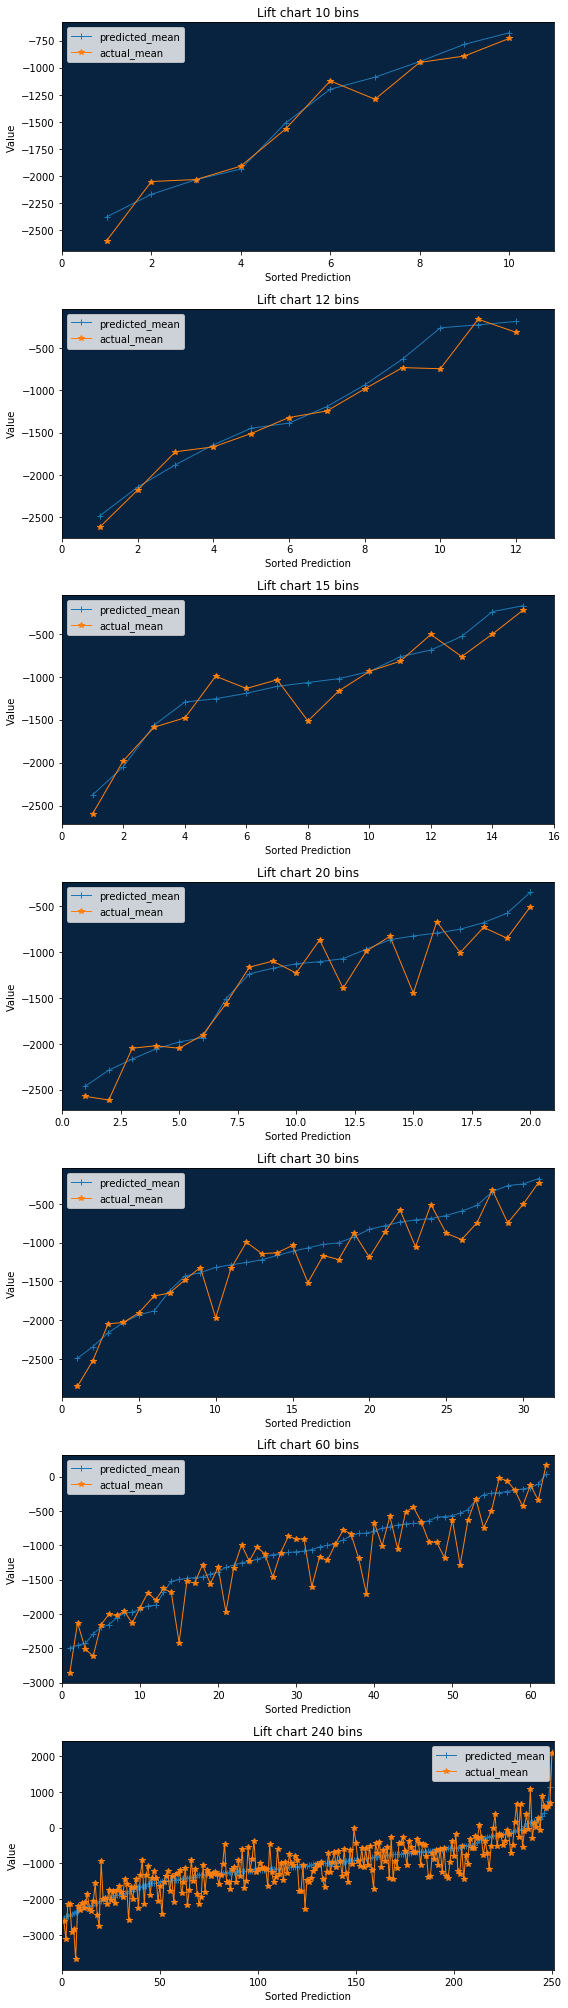

In [19]:
lift_chart(bin_counts)

##### Feature Impact based on the selected model

Text(0.5, 1.04, 'Feature Impact')

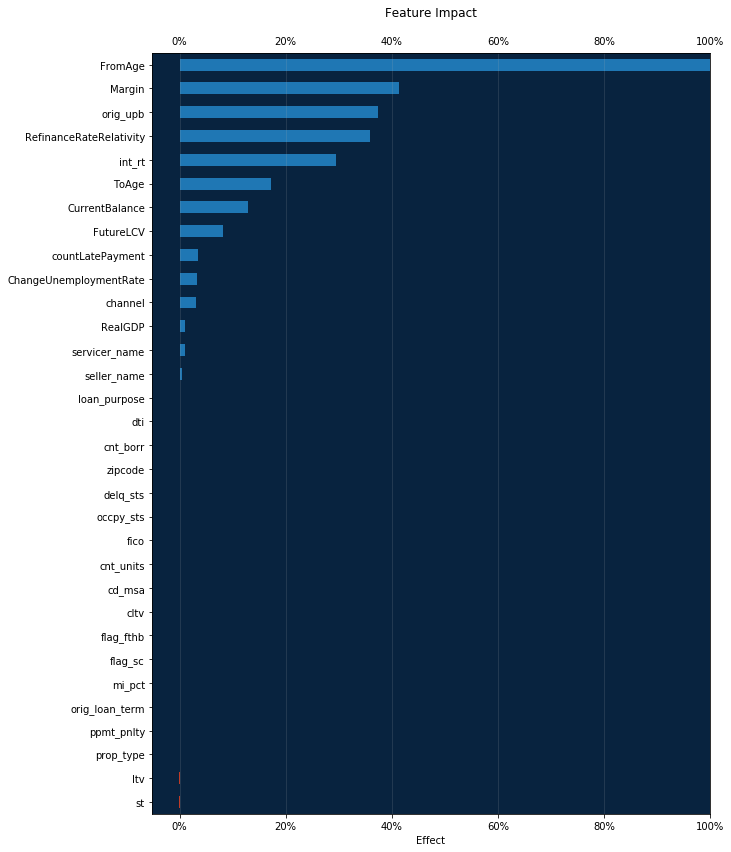

In [20]:
feature_impacts = model.get_or_request_feature_impact()

# Formats the ticks from a float into a percent
percent_tick_fmt = mtick.PercentFormatter(xmax=1.0)

impact_df = pd.DataFrame(feature_impacts)
impact_df.sort_values(by='impactNormalized', ascending=True, inplace=True)

# Positive values are blue, negative are red
bar_colors = impact_df.impactNormalized.apply(lambda x: dr_red if x < 0
                                              else dr_blue)

ax = impact_df.plot.barh(x='featureName', y='impactNormalized',
                         legend=False,
                         color=bar_colors,
                         figsize=(10, 14))
ax.xaxis.set_major_formatter(percent_tick_fmt)
ax.xaxis.set_tick_params(labeltop=True)
ax.xaxis.grid(True, alpha=0.2)
ax.set_facecolor(dr_dark_blue)

plt.ylabel('')
plt.xlabel('Effect')
plt.xlim((None, 1))  # Allow for negative impact
plt.title('Feature Impact', y=1.04)